In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("complaints.csv")

C:\Users\kjs\AppData\Local\Temp\ipykernel_301196\1047253087.py:1: DtypeWarning: Columns (5,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("complaints.csv")


In [3]:
# Display basic information about the dataset
print("Initial Data Info:")
df.info()



Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6018300 entries, 0 to 6018299
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)

In [4]:
# Display the first few rows of the dataset
df.head()



,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2024-08-20,Vehicle loan or lease,Loan,Repossession,Notice to repossess,NaN,NaN,United PanAm Financial Corp.,AZ,85009,NaN,NaN,Web,2024-08-20,Closed with explanation,Yes,NaN,9865980
1,2024-08-19,Checking or savings account,Savings account,Managing an account,Deposits and withdrawals,NaN,NaN,"AXOS FINANCIAL, INC.",TX,75206,NaN,NaN,Web,2024-08-19,Closed with explanation,Yes,NaN,9849260
2,2024-08-17,Checking or savings account,Savings account,Managing an account,Deposits and withdrawals,NaN,NaN,GOLDMAN SACHS BANK USA,GA,30260,NaN,NaN,Web,2024-08-17,In progress,Yes,NaN,9830760
3,2024-08-23,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,NaN,NaN,ENCORE CAPITAL GROUP INC.,IL,60559,NaN,NaN,Web,2024-08-23,In progress,Yes,NaN,9890740
4,2024-08-14,Debt collection,Auto debt,Communication tactics,Frequent or repeated calls,NaN,NaN,"Westlake Services, LLC",OH,44691,NaN,NaN,Web,2024-08-14,In progress,Yes,NaN,9802940


In [5]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())




Missing values in each column:
Date received                         0
Product                               0
Sub-product                      235295
Issue                                 6
Sub-issue                        746396
Consumer complaint narrative    3942102
Company public response         3096475
Company                               0
State                             47409
ZIP code                          30227
Tags                            5501963
Consumer consent provided?      1122364
Submitted via                         0
Date sent to company                  0
Company response to consumer         20
Timely response?                      0
Consumer disputed?              5249984
Complaint ID                          0
dtype: int64


In [6]:
# Handle missing values
# Here, we'll fill missing 'Consumer consent provided?' with 'Unknown'
df['Consumer consent provided?'] = df['Consumer consent provided?'].fillna('Unknown')



In [7]:
# Fill missing 'Sub-product' and 'Sub-issue' with 'Not specified'
df['Sub-product'] = df['Sub-product'].fillna('Not specified')
df['Sub-issue'] = df['Sub-issue'].fillna('Not specified')



In [8]:
# Fill missing 'Company response to consumer' with 'No response'
df['Company response to consumer'] = df['Company response to consumer'].fillna('No response')



In [9]:
# Drop rows where ZIP code is missing
df = df.dropna(subset=['ZIP code'])



In [10]:
# Convert 'Date received' and 'Date sent to company' to datetime format
df['Date received'] = pd.to_datetime(df['Date received'])
df['Date sent to company'] = pd.to_datetime(df['Date sent to company'])

In [11]:
# Check again for missing values after handling
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5988073 entries, 0 to 6018299
Data columns (total 18 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   Date received                 datetime64[ns]
 1   Product                       object        
 2   Sub-product                   object        
 3   Issue                         object        
 4   Sub-issue                     object        
 5   Consumer complaint narrative  object        
 6   Company public response       object        
 7   Company                       object        
 8   State                         object        
 9   ZIP code                      object        
 10  Tags                          object        
 11  Consumer consent provided?    object        
 12  Submitted via                 object        
 13  Date sent to company          datetime64[ns]
 14  Company response to consumer  object        
 15  Timely response?              object 

In [12]:
# Drop duplicate entries, if any
df = df.drop_duplicates()

print("\nData after cleaning:")
print(df.head())


Data after cleaning:
  Date received                      Product      Sub-product  \
0    2024-08-20        Vehicle loan or lease             Loan   
1    2024-08-19  Checking or savings account  Savings account   
2    2024-08-17  Checking or savings account  Savings account   
3    2024-08-23              Debt collection    I do not know   
4    2024-08-14              Debt collection        Auto debt   

                               Issue                   Sub-issue  \
0                       Repossession         Notice to repossess   
1                Managing an account    Deposits and withdrawals   
2                Managing an account    Deposits and withdrawals   
3  Attempts to collect debt not owed           Debt is not yours   
4              Communication tactics  Frequent or repeated calls   

  Consumer complaint narrative Company public response  \
0                          NaN                     NaN   
1                          NaN                     NaN   
2   

In [13]:
# Convert 'Date received' and 'Date sent to company' to datetime
df['Date received'] = pd.to_datetime(df['Date received'])
df['Date sent to company'] = pd.to_datetime(df['Date sent to company'])



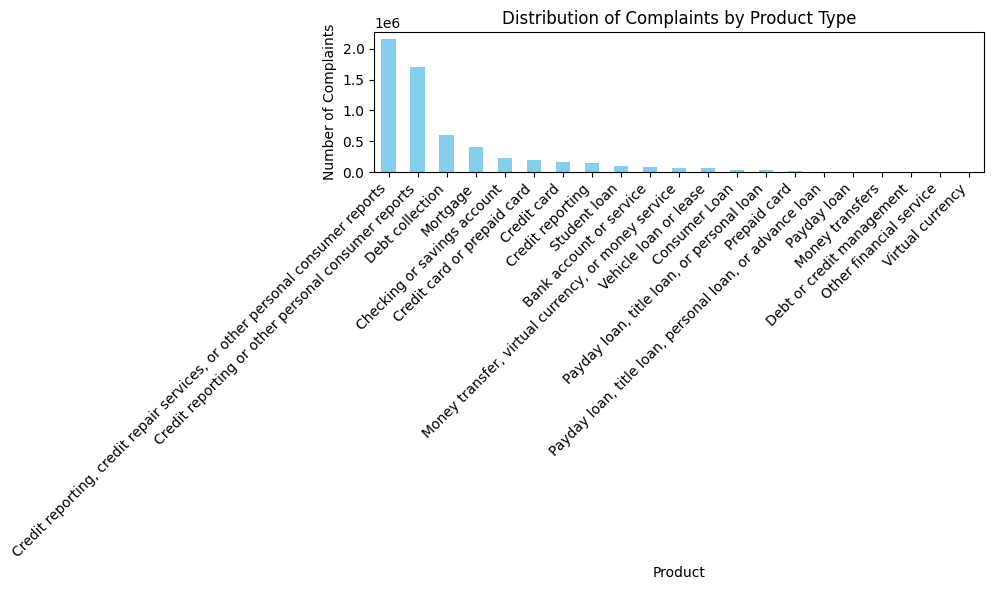

In [14]:
# Distribution of Complaints by Product Type
plt.figure(figsize=(10, 6))
df['Product'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Complaints by Product Type')
plt.xlabel('Product')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



### Distribution of Complaints by Product Type:

"Credit reporting, credit repair services, or other personal consumer reports" is the product type with the highest number of complaints.
We may want to focus on understanding the nature of these complaints in more detail.

C:\Users\kjs\AppData\Local\Temp\ipykernel_301196\968052771.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Timely response?', palette='viridis')


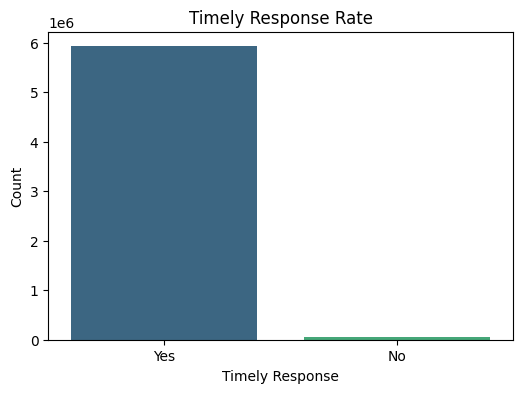

In [15]:
# Timely Response Rate Analysis
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Timely response?', palette='viridis')
plt.title('Timely Response Rate')
plt.xlabel('Timely Response')
plt.ylabel('Count')
plt.show()



### Timely Response Rate:

Most of the complaints receive a timely response, which indicates responsiveness, but it would be interesting to explore if there's any correlation between certain product types and untimely responses.

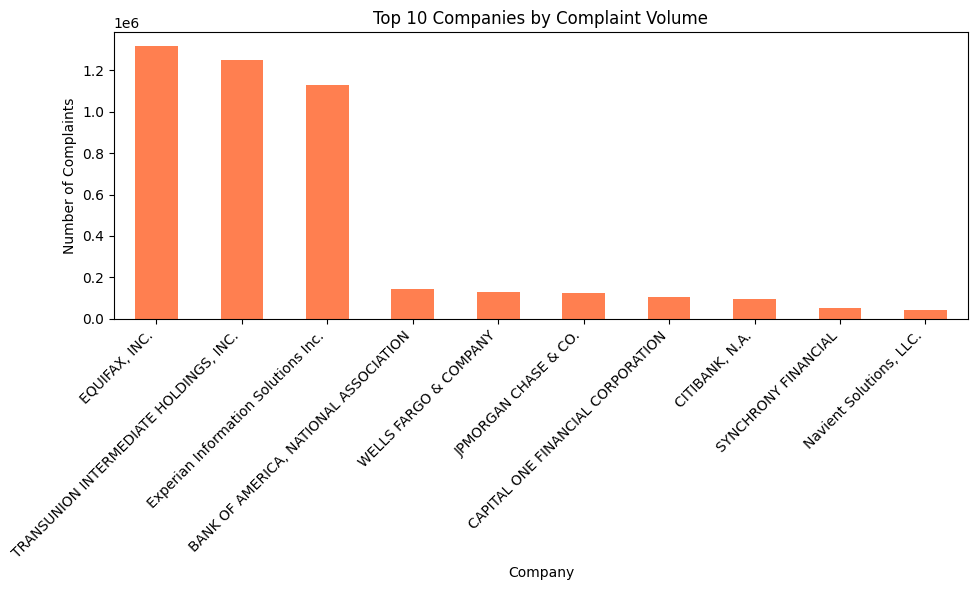

In [16]:
# Top 10 Companies by Complaint Volume
top_companies = df['Company'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
top_companies.plot(kind='bar', color='coral')
plt.title('Top 10 Companies by Complaint Volume')
plt.xlabel('Company')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Top 10 Companies by Complaint Volume:
Companies like Equifax, Experian, and Bank of America have the highest volume of complaints.
We could investigate whether the complaints are specific to certain issues and what actions were taken by these companies.

### Research Question 1:

Is there a correlation between consumer consent provision and the likelihood of a dispute being raised post-response?


Correlation between Consumer Consent and Likelihood of a Dispute:


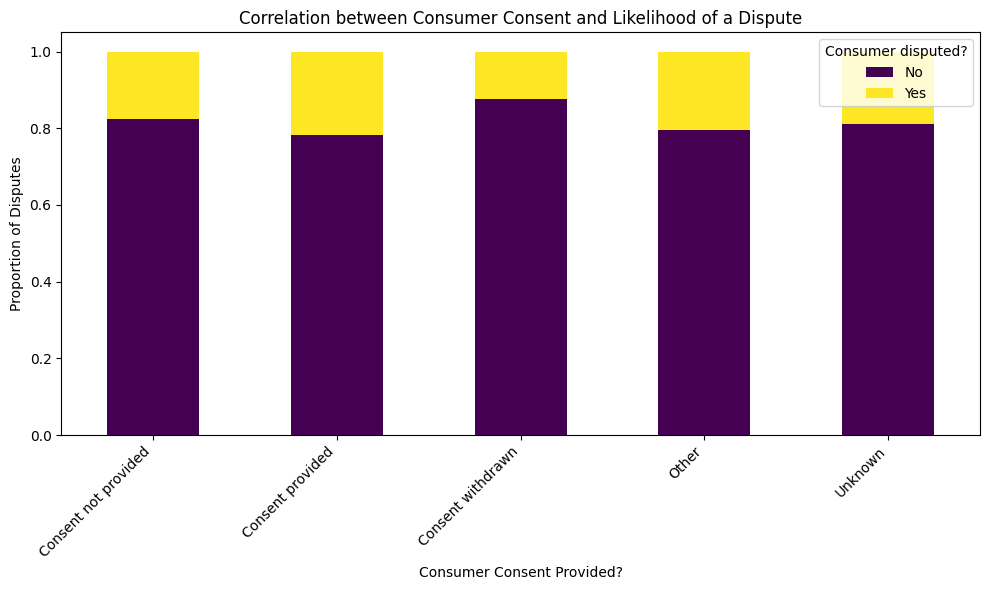

In [17]:
dispute_analysis = pd.crosstab(df['Consumer consent provided?'], df['Consumer disputed?'], normalize='index')
print("\nCorrelation between Consumer Consent and Likelihood of a Dispute:")

dispute_analysis.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Correlation between Consumer Consent and Likelihood of a Dispute')
plt.xlabel('Consumer Consent Provided?')
plt.ylabel('Proportion of Disputes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Research Question 2:

How does the method of submitting a complaint affect the company's response?


Effect of Submission Method on Company Response:


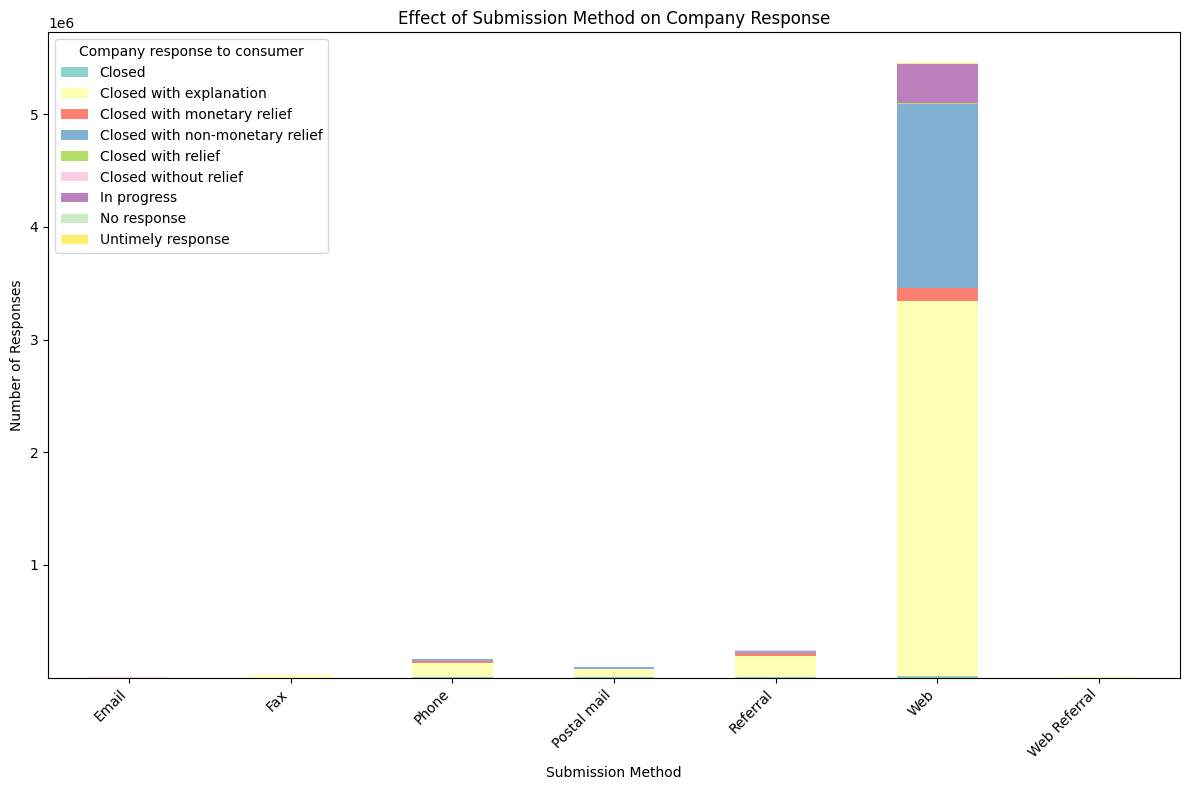

In [18]:
submission_response = df.groupby('Submitted via')['Company response to consumer'].value_counts().unstack().fillna(0)
print("\nEffect of Submission Method on Company Response:")

submission_response.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Set3')
plt.title('Effect of Submission Method on Company Response')
plt.xlabel('Submission Method')
plt.ylabel('Number of Responses')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Research Question 3:

How does the type of product relate to the company's response?


Product Type vs Company Response:


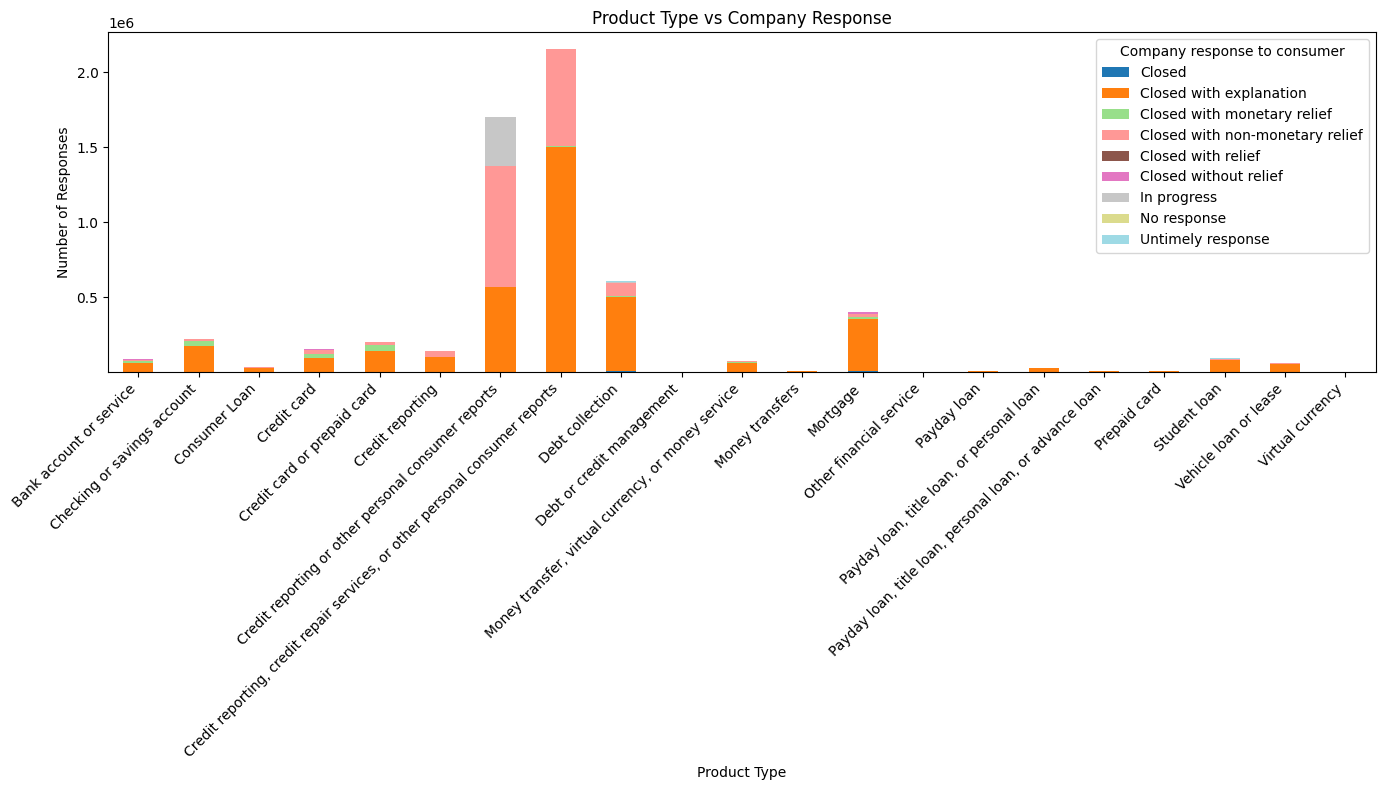

In [19]:
product_response = df.groupby('Product')['Company response to consumer'].value_counts().unstack().fillna(0)
print("\nProduct Type vs Company Response:")

product_response.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title('Product Type vs Company Response')
plt.xlabel('Product Type')
plt.ylabel('Number of Responses')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Research Question 4:

How does the type of product affect a company's response, such as closing without financial relief? or closing with financial relief

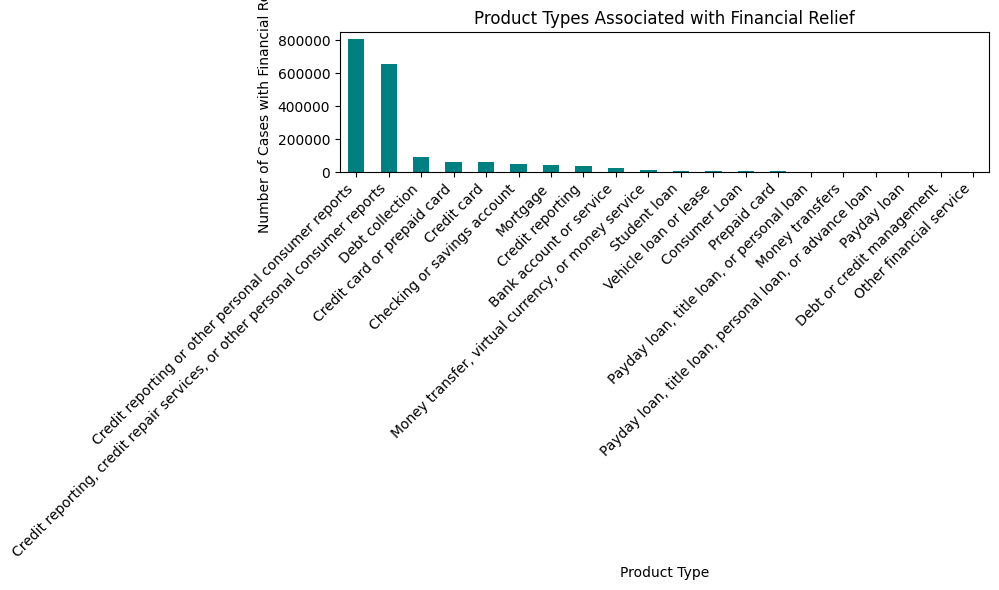

In [20]:
financial_relief = df[df['Company response to consumer'].str.contains('relief', case=False, na=False)]
product_financial_relief = financial_relief['Product'].value_counts()

plt.figure(figsize=(10, 6))
product_financial_relief.plot(kind='bar', color='teal')
plt.title('Product Types Associated with Financial Relief')
plt.xlabel('Product Type')
plt.ylabel('Number of Cases with Financial Relief')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [28]:
df_tx = df[df["State"] == "TX"]

In [29]:
df_tx.shape

(661544, 18)

In [30]:
df_tx.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
1,2024-08-19,Checking or savings account,Savings account,Managing an account,Deposits and withdrawals,NaN,NaN,"AXOS FINANCIAL, INC.",TX,75206,NaN,Unknown,Web,2024-08-19,Closed with explanation,Yes,NaN,9849260
15,2013-12-03,Debt collection,Credit card,Taking/threatening an illegal action,Threatened to sue on too old debt,NaN,NaN,JPMORGAN CHASE & CO.,TX,78577,NaN,Unknown,Web,2013-12-02,Closed with explanation,Yes,No,618643
28,2013-10-01,Consumer Loan,Vehicle loan,Managing the loan or lease,Not specified,NaN,NaN,DriveTime,TX,75189,NaN,Unknown,Referral,2013-10-02,Closed,Yes,Yes,550177
29,2024-08-16,"Payday loan, title loan, personal loan, or adv...",Personal line of credit,Getting a line of credit,Not specified,NaN,NaN,PNC Bank N.A.,TX,77511,NaN,Unknown,Web,2024-08-16,In progress,Yes,NaN,9808936
32,2024-08-06,Checking or savings account,Checking account,Closing an account,Company closed your account,NaN,NaN,WELLS FARGO & COMPANY,TX,75402,NaN,Unknown,Web,2024-08-06,In progress,Yes,NaN,9724731


In [31]:
# prompt: null value percentages

# Calculate null value percentages for each column
null_percentages = df.isnull().sum() / len(df) * 100

# Print the results
print("\nNull Value Percentages:")
null_percentages


Null Value Percentages:


Date received                    0.000000
Product                          0.000000
Sub-product                      0.000000
Issue                            0.000100
Sub-issue                        0.000000
Consumer complaint narrative    65.327777
Company public response         51.455719
Company                          0.000000
State                            0.290728
ZIP code                         0.000000
Tags                            91.451941
Consumer consent provided?       0.000000
Submitted via                    0.000000
Date sent to company             0.000000
Company response to consumer     0.000000
Timely response?                 0.000000
Consumer disputed?              87.233639
Complaint ID                     0.000000
dtype: float64

In [32]:
# Drop specified columns
df_tx = df_tx.drop(columns=['Consumer complaint narrative', 'Company public response', 'Tags', 'Consumer disputed?', 'State', "ZIP code",	"Consumer consent provided?", 'Complaint ID', 'Date sent to company', 'Company'])

# Display the updated DataFrame info
df_tx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 661544 entries, 1 to 6018259
Data columns (total 8 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Date received                 661544 non-null  datetime64[ns]
 1   Product                       661544 non-null  object        
 2   Sub-product                   661544 non-null  object        
 3   Issue                         661544 non-null  object        
 4   Sub-issue                     661544 non-null  object        
 5   Submitted via                 661544 non-null  object        
 6   Company response to consumer  661544 non-null  object        
 7   Timely response?              661544 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 45.4+ MB


In [ ]:
# frequency encode product, sub-product, Issue, Sub-issue

# Calculate frequency encoding for specified columns
for col in ['Product', 'Sub-product', 'Issue', 'Sub-issue']:
    freq_encoding = df_tx[col].value_counts(normalize=True)
    df_tx[col + '_freq_encode'] = df_tx[col].map(freq_encoding)

In [34]:
df_tx = df_tx.drop(columns=['Product', 'Sub-product', 'Issue', 'Sub-issue'])


In [ ]:
# one hot encode Submitted via,	Company response to consumer

# Create dummy variables for 'Submitted via'
submitted_via_dummies = pd.get_dummies(df_tx['Submitted via'], prefix='Submitted_via')
df_tx = pd.concat([df_tx, submitted_via_dummies], axis=1)
df_tx = df_tx.drop(columns=['Submitted via'])

# Create dummy variables for 'Company response to consumer'
company_response_dummies = pd.get_dummies(df_tx['Company response to consumer'], prefix='Company_response')
df_tx = pd.concat([df_tx, company_response_dummies], axis=1)
df_tx = df_tx.drop(columns=['Company response to consumer'])

In [ ]:
# split date received into year_received, month_received, day_received and drop date received

df_tx['year_received'] = df_tx['Date received'].dt.year
df_tx['month_received'] = df_tx['Date received'].dt.month
df_tx['day_received'] = df_tx['Date received'].dt.day

# Drop the original 'Date received' column
df_tx = df_tx.drop(columns=['Date received'])

In [ ]:
# min max scale year_received, month_received, day_received, Product_freq_encode, Sub-product_freq_encode, Issue_freq_encode, Sub-issue_freq_encode

from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Select the columns to scale
columns_to_scale = ['year_received', 'month_received', 'day_received', 'Product_freq_encode', 'Sub-product_freq_encode', 'Issue_freq_encode', 'Sub-issue_freq_encode']

# Fit and transform the selected columns
df_tx[columns_to_scale] = scaler.fit_transform(df_tx[columns_to_scale])

# Display the scaled DataFrame
print(df_tx.head())

   Timely response?  Product_freq_encode  Sub-product_freq_encode  \
1               Yes             0.068748                 0.003284   
15              Yes             0.305029                 0.005007   
28              Yes             0.010905                 0.003621   
29              Yes             0.003261                 0.001802   
32              Yes             0.068748                 0.038128   

    Issue_freq_encode  Sub-issue_freq_encode  Submitted_via_Email  \
1            0.049462               0.026561                False   
15           0.004250               0.001908                False   
28           0.014526               0.345838                False   
29           0.000796               0.345838                False   
32           0.010858               0.014298                False   

    Submitted_via_Fax  Submitted_via_Phone  Submitted_via_Postal mail  \
1               False                False                      False   
15              False   

In [ ]:
# binary encode Timely response? with Yes as 1 and No as 0


# Create a mapping for binary encoding
timely_response_mapping = {'Yes': 1, 'No': 0}

# Apply the mapping to create the binary encoded column
df_tx['Timely response?'] = df_tx['Timely response?'].map(timely_response_mapping)


In [ ]:
# value counts of timely responce

print(df['Timely response?'].value_counts())

Timely response?
Yes    5928946
No       59127
Name: count, dtype: int64


In [ ]:
!pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 6.9 MB/s eta 0:00:0000:01

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
# use smote em for resampling and then buld a logistic regression on the resampled data

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Separate features (X) and target variable (y)
X = df_tx.drop('Timely response?', axis=1)
y = df_tx['Timely response?']

# Apply SMOTE to resample the data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize and train a Logistic Regression model
logreg = LogisticRegression(max_iter=1000) # Increased max_iter to ensure convergence
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79    131603
           1       0.80      0.76      0.78    130776

    accuracy                           0.79    262379
   macro avg       0.79      0.79      0.79    262379
weighted avg       0.79      0.79      0.79    262379

[[107449  24154]
 [ 31928  98848]]


In [41]:
# knn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn_classifier.fit(X_train, y_train)

# Predict the labels on the test set
y_pred = knn_classifier.predict(X_test)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))    
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.99      0.97    131603
           1       0.99      0.96      0.97    130776

    accuracy                           0.97    262379
   macro avg       0.98      0.97      0.97    262379
weighted avg       0.97      0.97      0.97    262379

[[130354   1249]
 [  5437 125339]]


Note: Due to hardware constraints in our local system, we have used Kaggle for the next part of the code.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Separate features (X) and target variable (y)
X = df_tx.drop('Timely response?', axis=1)
y = df_tx['Timely response?']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Normalize the features
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Configure TPU strategy
try:
    # Detect TPU
    resolver = tf.distribute.cluster_resolver.TPUClusterResolver()  # Detect TPU
    tf.config.experimental_connect_to_cluster(resolver)
    tf.tpu.experimental.initialize_tpu_system(resolver)
    strategy = tf.distribute.TPUStrategy(resolver)
    print("Running on TPU:", resolver.cluster_spec().as_dict())
except ValueError:
    # If TPU not found, fallback to default strategy (CPU/GPU)
    strategy = tf.distribute.get_strategy()
    print("Running on CPU/GPU")

# Build the ANN model inside the strategy scope
with strategy.scope():
    model = Sequential([
        Dense(128, input_dim=X_train.shape[1], activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # Binary classification, so 'sigmoid'
    ])
    
    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


E0000 00:00:1733347451.076135      13 common_lib.cc:798] Could not set metric server port: INVALID_ARGUMENT: Could not find SliceBuilder port 8471 in any of the 0 ports provided in `tpu_process_addresses`="local"
=== Source Location Trace: === 
learning/45eac/tfrc/runtime/common_lib.cc:479
D1204 21:24:11.084259152      13 config.cc:196]                        gRPC EXPERIMENT call_status_override_on_cancellation   OFF (default:OFF)
D1204 21:24:11.084273180      13 config.cc:196]                        gRPC EXPERIMENT call_v3                                OFF (default:OFF)
D1204 21:24:11.084276488      13 config.cc:196]                        gRPC EXPERIMENT canary_client_privacy                  ON  (default:ON)
D1204 21:24:11.084278952      13 config.cc:196]                        gRPC EXPERIMENT capture_base_context                   ON  (default:ON)
D1204 21:24:11.084281682      13 config.cc:196]                        gRPC EXPERIMENT client_idleness                        ON  (defa

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local


I0000 00:00:1733347464.678537      13 service.cc:145] XLA service 0x57183cb581f0 initialized for platform TPU (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733347464.678593      13 service.cc:153]   StreamExecutor device (0): TPU, 2a886c8
I0000 00:00:1733347464.678597      13 service.cc:153]   StreamExecutor device (1): TPU, 2a886c8
I0000 00:00:1733347464.678600      13 service.cc:153]   StreamExecutor device (2): TPU, 2a886c8
I0000 00:00:1733347464.678603      13 service.cc:153]   StreamExecutor device (3): TPU, 2a886c8
I0000 00:00:1733347464.678606      13 service.cc:153]   StreamExecutor device (4): TPU, 2a886c8
I0000 00:00:1733347464.678609      13 service.cc:153]   StreamExecutor device (5): TPU, 2a886c8
I0000 00:00:1733347464.678612      13 service.cc:153]   StreamExecutor device (6): TPU, 2a886c8
I0000 00:00:1733347464.678614      13 service.cc:153]   StreamExecutor device (7): TPU, 2a886c8


INFO:tensorflow:Finished initializing TPU system.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)
I

/usr/local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1733347468.851456      13 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Epoch 1/20


2024-12-04 21:24:34.039519: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node StatefulPartitionedCall.
I0000 00:00:1733347474.321166    2232 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(9e3180ac6eaaf131:0:0), session_name()


   19/16399 ━━━━━━━━━━━━━━━━━━━━ 2:23 9ms/step - accuracy: 0.5909 - loss: 0.6908

I0000 00:00:1733347476.911804    2232 tpu_compile_op_common.cc:245] Compilation of 9e3180ac6eaaf131:0:0 with session name  took 2.59057758s and succeeded
I0000 00:00:1733347476.925240    2232 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(9e3180ac6eaaf131:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_6480635722522494999", property.function_library_fingerprint = 11361421883031710191, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "8,23,;8,1,;", property.guaranteed_constants_size = 0, embedding_partitions_fingerprint = "1688352644216761960")
I0000 00:00:1733347476.925281    2232 tpu_compilation_cache_interface.cc:541] After adding entry for key 9e3180ac6

16393/16399 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7976 - loss: 0.4322

I0000 00:00:1733347604.402181    2256 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(f66a2a6e628be722:0:0), session_name()


16399/16399 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7976 - loss: 0.4322

I0000 00:00:1733347606.936048    2256 tpu_compile_op_common.cc:245] Compilation of f66a2a6e628be722:0:0 with session name  took 2.53381884s and succeeded
I0000 00:00:1733347606.951722    2256 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(f66a2a6e628be722:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_6480635722522494999", property.function_library_fingerprint = 11361421883031710191, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "6,23,;6,1,;", property.guaranteed_constants_size = 0, embedding_partitions_fingerprint = "1688352644216761960")
I0000 00:00:1733347606.951785    2256 tpu_compilation_cache_interface.cc:541] After adding entry for key f66a2a6e6

16399/16399 ━━━━━━━━━━━━━━━━━━━━ 161s 10ms/step - accuracy: 0.7976 - loss: 0.4322 - val_accuracy: 0.8161 - val_loss: 0.3950
Epoch 2/20


I0000 00:00:1733347633.246077    2256 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(ff0b6ec5ad4e96fd:0:0), session_name()
I0000 00:00:1733347633.397555    2256 tpu_compile_op_common.cc:245] Compilation of ff0b6ec5ad4e96fd:0:0 with session name  took 151.441782ms and succeeded
I0000 00:00:1733347633.399430    2256 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(ff0b6ec5ad4e96fd:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_2034401190270991707", property.function_library_fingerprint = 17133354595525491612, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "6,23,;6,1,;", property.guaranteed_constants_size = 0, embedding_pa

16399/16399 ━━━━━━━━━━━━━━━━━━━━ 153s 9ms/step - accuracy: 0.8095 - loss: 0.4057 - val_accuracy: 0.8166 - val_loss: 0.3910
Epoch 3/20
16399/16399 ━━━━━━━━━━━━━━━━━━━━ 155s 9ms/step - accuracy: 0.8118 - loss: 0.4009 - val_accuracy: 0.8188 - val_loss: 0.3867
Epoch 4/20
16399/16399 ━━━━━━━━━━━━━━━━━━━━ 153s 9ms/step - accuracy: 0.8161 - loss: 0.3951 - val_accuracy: 0.8213 - val_loss: 0.3847
Epoch 5/20
16399/16399 ━━━━━━━━━━━━━━━━━━━━ 155s 9ms/step - accuracy: 0.8152 - loss: 0.3954 - val_accuracy: 0.8221 - val_loss: 0.3814
Epoch 6/20
16399/16399 ━━━━━━━━━━━━━━━━━━━━ 155s 9ms/step - accuracy: 0.8159 - loss: 0.3915 - val_accuracy: 0.8222 - val_loss: 0.3815
Epoch 7/20
16399/16399 ━━━━━━━━━━━━━━━━━━━━ 155s 9ms/step - accuracy: 0.8163 - loss: 0.3914 - val_accuracy: 0.8234 - val_loss: 0.3822
Epoch 8/20
16399/16399 ━━━━━━━━━━━━━━━━━━━━ 154s 9ms/step - accuracy: 0.8186 - loss: 0.3892 - val_accuracy: 0.8245 - val_loss: 0.3806
Epoch 9/20
16399/16399 ━━━━━━━━━━━━━━━━━━━━ 155s 9ms/step - accuracy: 0.8

I0000 00:00:1733350565.976743    2235 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(bb50cd6d2905e079:0:0), session_name()
I0000 00:00:1733350566.130295    2235 tpu_compile_op_common.cc:245] Compilation of bb50cd6d2905e079:0:0 with session name  took 153.478913ms and succeeded
I0000 00:00:1733350566.131883    2235 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(bb50cd6d2905e079:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_2034401190270991707", property.function_library_fingerprint = 17133354595525491612, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "4,23,;4,1,;", property.guaranteed_constants_size = 0, embedding_pa

8200/8200 ━━━━━━━━━━━━━━━━━━━━ 52s 6ms/step - accuracy: 0.8312 - loss: 0.3696


I0000 00:00:1733350617.291319    2214 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(82b040ac4121e7a9:0:0), session_name()
I0000 00:00:1733350617.444703    2214 tpu_compile_op_common.cc:245] Compilation of 82b040ac4121e7a9:0:0 with session name  took 153.338888ms and succeeded
I0000 00:00:1733350617.446448    2214 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(82b040ac4121e7a9:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_2034401190270991707", property.function_library_fingerprint = 17133354595525491612, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "2,23,;2,1,;", property.guaranteed_constants_size = 0, embedding_pa

Test Loss: 0.36984872817993164
Test Accuracy: 0.8320324420928955
   3/8200 ━━━━━━━━━━━━━━━━━━━━ 3:40 27ms/step    

2024-12-04 22:16:58.145297: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node sequential_1/dense_1/Add/ReadVariableOp.
I0000 00:00:1733350618.174208    2197 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(fb509edbc5c5fa33:0:0), session_name()
I0000 00:00:1733350618.235952    2197 tpu_compile_op_common.cc:245] Compilation of fb509edbc5c5fa33:0:0 with session name  took 61.706891ms and succeeded
I0000 00:00:1733350618.236635    2197 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(fb509edbc5c5fa33:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_data_distributed_2584057253438403211", property.function_library_fingerprint = 9412572572626441429, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topo

8200/8200 ━━━━━━━━━━━━━━━━━━━━ 237s 29ms/step


2024-12-04 22:20:54.749036: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node sequential_1/dense_1/Add/ReadVariableOp.
I0000 00:00:1733350854.838497    2235 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(2409ff523cb5a879:0:0), session_name()
I0000 00:00:1733350854.915135    2235 tpu_compile_op_common.cc:245] Compilation of 2409ff523cb5a879:0:0 with session name  took 76.596878ms and succeeded
I0000 00:00:1733350854.915640    2235 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(2409ff523cb5a879:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_data_distributed_438279692725512049", property.function_library_fingerprint = 14498371212235473257, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topo

              precision    recall  f1-score   support

           0       0.80      0.89      0.84    131603
           1       0.88      0.78      0.82    130776

    accuracy                           0.83    262379
   macro avg       0.84      0.83      0.83    262379
weighted avg       0.84      0.83      0.83    262379

[[117280  14323]
 [ 29151 101625]]
